https://github.com/kairess/cat_hipsterizer 의 코드를 참조함

# 데이터 준비

In [74]:
!pip install gdown

In [90]:
# orginal shared link : https://drive.google.com/file/d/1_l-0FUDU1EovwlhnILnrrC0labjWtgCJ/view?usp=sharing
!gdown https://drive.google.com/uc?id=1_l-0FUDU1EovwlhnILnrrC0labjWtgCJ

Downloading...
From: https://drive.google.com/uc?id=1_l-0FUDU1EovwlhnILnrrC0labjWtgCJ
To: /content/cat_face_keypoint.zip
201MB [00:01, 152MB/s]


In [92]:
!unzip cat_face_keypoint.zip

Archive:  cat_face_keypoint.zip
  inflating: cat_image_and_keypoint.npy  
  inflating: memo.txt                


In [1]:
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from keras.applications import mobilenet_v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
img_size = 224

https://www.kaggle.com/crawford/cat-dataset 의
고양이 영상 파일과 레이블링 데이터를 읽고 numpy 파일로 저장해 두었다. <br>


In [3]:
numpy_data = np.load('cat_image_and_keypoint.npy', allow_pickle=True)
dic_data = numpy_data.item()
x = np.array(dic_data.get('imgs'))
y = np.array(dic_data.get('lmks'))

In [4]:
print(x.shape)
print(y.shape)

(1706, 224, 224, 3)
(1706, 18)


## 이미지 보기

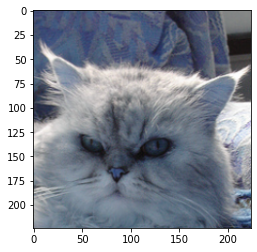

[ 59 135 128 137  85 177  32  93  19  48  50  64 172  72 205  67 188 106]


In [5]:
plt.imshow(x[0])
plt.show()
print(y[0])

## 키 포인트 보기

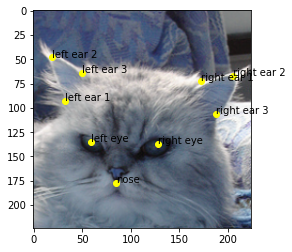

In [6]:
target_x = x[0]
target_y = y[0]

plt.imshow(target_x)

plt.scatter(target_y[0], target_y[1], color='yellow')
plt.text(target_y[0], target_y[1], 'left eye')
plt.scatter(target_y[2], target_y[3], color='yellow')
plt.text(target_y[2], target_y[3], 'right eye')
plt.scatter(target_y[4], target_y[5], color='yellow')
plt.text(target_y[4], target_y[5], 'nose')
plt.scatter(target_y[6], target_y[7], color='yellow')
plt.text(target_y[6], target_y[7], 'left ear 1')
plt.scatter(target_y[8], target_y[9], color='yellow')
plt.text(target_y[8], target_y[9], 'left ear 2')
plt.scatter(target_y[10], target_y[11], color='yellow')
plt.text(target_y[10], target_y[11], 'left ear 3')
plt.scatter(target_y[12], target_y[13], color='yellow')
plt.text(target_y[12], target_y[13], 'right ear 1')
plt.scatter(target_y[14], target_y[15], color='yellow')
plt.text(target_y[14], target_y[15], 'right ear 2')
plt.scatter(target_y[16], target_y[17], color='yellow')
plt.text(target_y[16], target_y[17], 'right ear 3')

plt.show()

## 코만 추리기

코에 해당하는 인덱스 4,5만 추림

In [7]:
y = y[:,4:6]

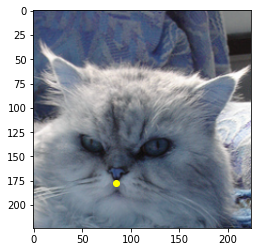

In [66]:
target_x = x[0]
target_y = y[0]

plt.imshow(target_x)
plt.scatter(target_y[0], target_y[1], color='yellow')
plt.show()

## normalization

In [10]:
x = x / 255.

## 데이터 분리

In [67]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)

# 모델 학습

## 모델 정의

In [68]:
inputs = Input(shape=(img_size, img_size, 3))

mobilenetv2_model = mobilenet_v2.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet', input_tensor=inputs, pooling='max')

net = Dense(128, activation='relu')(mobilenetv2_model.layers[-1].output)
net = Dense(64, activation='relu')(net)
net = Dense(2)(net)

model = Model(inputs=inputs, outputs=net)

model.summary()

model.compile(optimizer='Adam', loss='mse')

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

## 학습

In [69]:
model.fit(train_x, train_y, epochs=100, batch_size=16, validation_split=0.1, verbose=1,
          callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1, mode='auto')]
          )

Epoch 1/100
77/77 [==============================] - 21s 207ms/step - loss: 2156.5718 - val_loss: 7145.1030
Epoch 2/100
77/77 [==============================] - 15s 193ms/step - loss: 236.1216 - val_loss: 9658.9365
Epoch 3/100
77/77 [==============================] - 15s 194ms/step - loss: 90.3139 - val_loss: 10171.3066
Epoch 4/100
77/77 [==============================] - 15s 194ms/step - loss: 51.4822 - val_loss: 8661.4902
Epoch 5/100
77/77 [==============================] - 15s 192ms/step - loss: 41.8249 - val_loss: 7204.9644
Epoch 6/100
77/77 [==============================] - 15s 193ms/step - loss: 28.3717 - val_loss: 5443.7773
Epoch 7/100
77/77 [==============================] - 15s 192ms/step - loss: 18.3686 - val_loss: 4333.9946
Epoch 8/100
77/77 [==============================] - 15s 192ms/step - loss: 19.5558 - val_loss: 2945.7144
Epoch 9/100
77/77 [==============================] - 15s 193ms/step - loss: 14.5204 - val_loss: 2466.2495
Epoch 10/100
77/77 [======================

## 결과 보기

In [71]:
predicted = model.predict(test_x[:16])

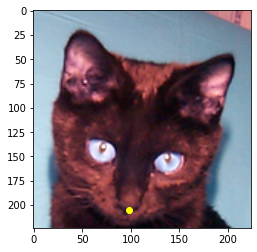

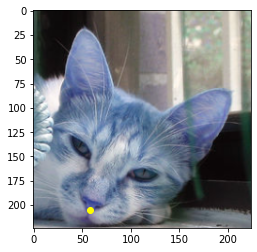

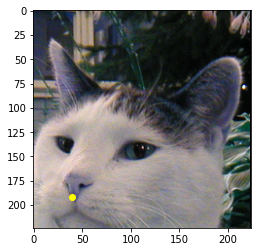

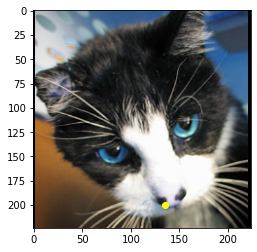

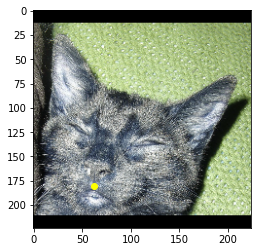

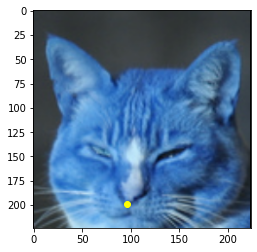

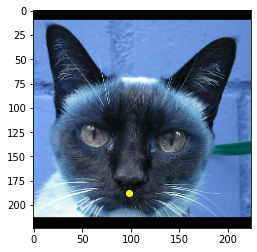

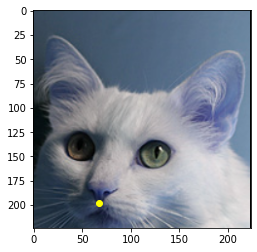

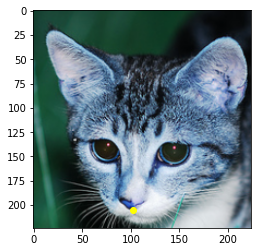

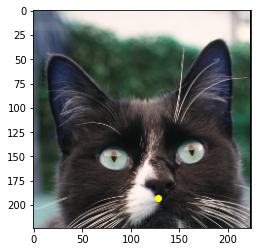

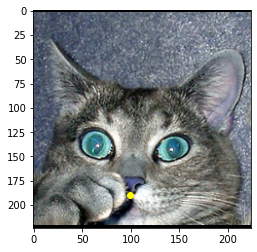

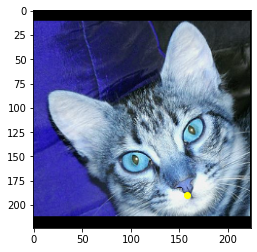

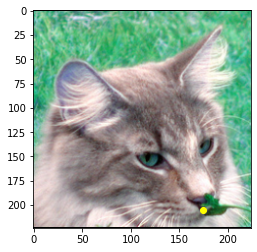

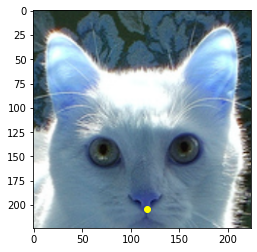

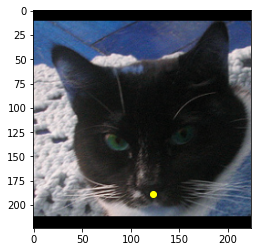

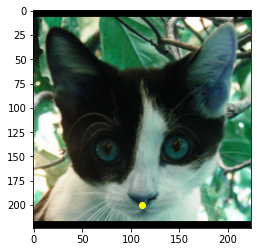

In [73]:
for i in range(16):
  plt.imshow(test_x[i])
  plt.scatter(predicted[i][0], predicted[i][1], color='yellow')
  plt.show()